# Movie Recommendation System

In [1]:
!pip install wordcloud

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

sns.set_style('darkgrid')

In [3]:
## reading dataset 

df_movies = pd.read_csv(r'D:\\Hackathon\\Movie_Recommendation_System\\movies.csv')
df_rating = pd.read_csv(r'D:\\Hackathon\\Movie_Recommendation_System\\ratings.csv')

In [4]:
## displaying first 5 rows of movies dataset
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


df_movies has 3 columns moviesid,title and genres

In [5]:
## displaying last 5 rows of ratings dataset
df_rating.tail()

,userId,movieId,rating,timestamp
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663
100003,671,6565,3.5,1074784724


rating dataset has 4 columns useid,movieid,rating and timestamp

In [6]:
print("Movies data shape: ", df_movies.shape)
print("Ratings data shape: ", df_rating.shape)

Movies data shape:  (9125, 3)
Ratings data shape:  (100004, 4)


In [7]:
## checking null values in movies dataset
df_movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [8]:
## checking null values in ratings dataset
df_rating.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [54]:
#Checking unique genres in the dataset
df_movies.genres.unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller',
       'Adventure|Children', 'Action', 'Action|Adventure|Thriller',
       'Comedy|Horror', 'Adventure|Animation|Children', 'Drama',
       'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance',
       'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller',
       'Crime|Drama|Horror|Mystery|Thriller', 'Drama|Sci-Fi',
       'Children|Drama', 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
       'Mystery|Sci-Fi|Thriller', 'Documentary|IMAX', 'Children|Comedy',
       'Drama|War', 'Action|Crime|Drama', 'Action|Adventure|Fantasy',
       'Comedy|Drama|Thriller', 'Mystery|Thriller',
       'Animation|Children|Drama|Musical|Romance',
       'Crime|Mystery|Thriller', 'Adventure|Drama', 'Drama|Mystery',
       'Drama|Thriller', 'Comedy|Crime', 'Action|Sci-Fi|Thriller',
       'Action|Comedy|Horror|Thriller', 'Com

In [10]:
#splitting every genre entry separately
total_genres = []

for g in df_movies.genres:
    g = g.split('|') ## spliting every generes from '|'
    ## checking if the is not present in the list 
    if g not in total_genres:
        total_genres.append(g)

In [11]:
total_genres

[['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'],
 ['Adventure', 'Children', 'Fantasy'],
 ['Comedy', 'Romance'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy'],
 ['Action', 'Crime', 'Thriller'],
 ['Adventure', 'Children'],
 ['Action'],
 ['Action', 'Adventure', 'Thriller'],
 ['Comedy', 'Horror'],
 ['Adventure', 'Animation', 'Children'],
 ['Drama'],
 ['Action', 'Adventure', 'Romance'],
 ['Crime', 'Drama'],
 ['Drama', 'Romance'],
 ['Action', 'Comedy', 'Crime', 'Drama', 'Thriller'],
 ['Comedy', 'Crime', 'Thriller'],
 ['Crime', 'Drama', 'Horror', 'Mystery', 'Thriller'],
 ['Drama', 'Sci-Fi'],
 ['Children', 'Drama'],
 ['Adventure', 'Drama', 'Fantasy', 'Mystery', 'Sci-Fi'],
 ['Mystery', 'Sci-Fi', 'Thriller'],
 ['Documentary', 'IMAX'],
 ['Children', 'Comedy'],
 ['Drama', 'War'],
 ['Action', 'Crime', 'Drama'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Comedy', 'Drama', 'Thriller'],
 ['Mystery', 'Thriller'],
 ['Animation', 'Children', 'Drama', 'Musical', 'Romance'],
 ['Crime', 'Mystery', 

In [12]:
df_movies.title.head()

0                      Toy Story (1995)
1                        Jumanji (1995)
2               Grumpier Old Men (1995)
3              Waiting to Exhale (1995)
4    Father of the Bride Part II (1995)
Name: title, dtype: object

In [14]:
#separating movie name from year
df_movies.title[0][:-7]

'Toy Story'

In [15]:
#filling data separately for title and year
year, title = [], []
for t in df_movies.title:
    title.append(t[:-7])
    year.append(t[-7:])

In [16]:
year[:5], title[:5]

([' (1995)', ' (1995)', ' (1995)', ' (1995)', ' (1995)'],
 ['Toy Story',
  'Jumanji',
  'Grumpier Old Men',
  'Waiting to Exhale',
  'Father of the Bride Part II'])

In [55]:
#using WordCloud to get word counts from total_genres and titles
word_cloud_genre=WordCloud(width=1500,height=800,background_color='black',min_font_size=2 ,
                        min_word_length=3).generate(str(total_genres))

word_cloud_title=WordCloud(width=1500,height=800,background_color='cyan',min_font_size=2 ,
                        min_word_length=3).generate(str(title))

## Plotting Movies Genres

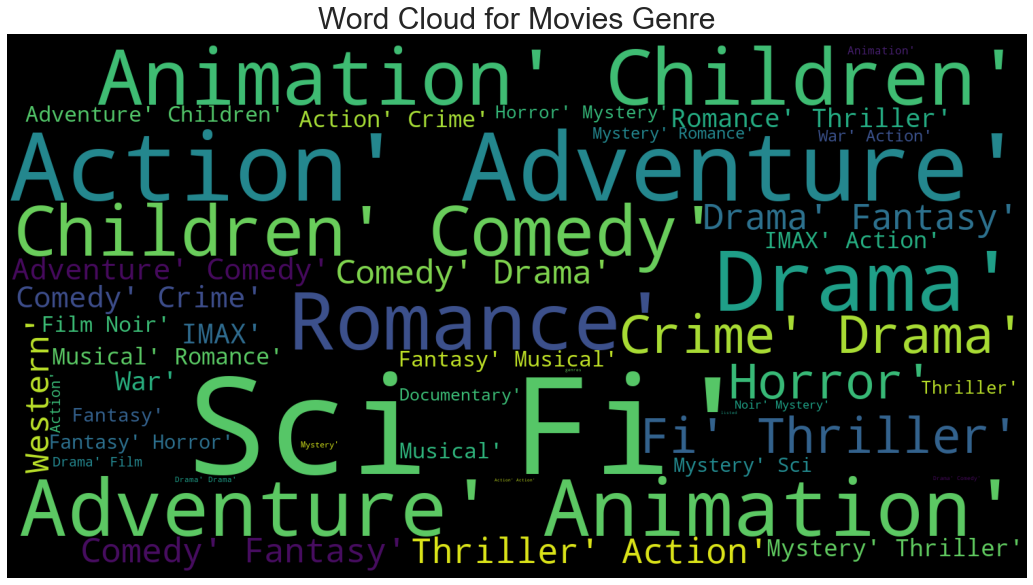

In [18]:
plt.figure(figsize=(20,10))
plt.axis('off')
plt.title('Word Cloud for Movies Genre',fontsize=30)
plt.imshow(word_cloud_genre);

## Plotitng Movies Titles

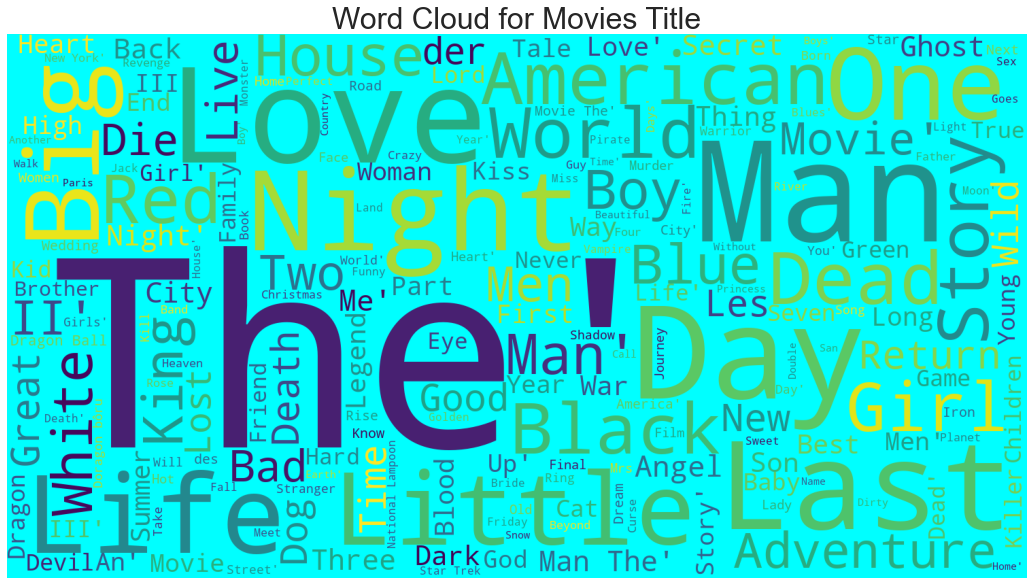

In [19]:
plt.figure(figsize=(20,10))
plt.axis('off')
plt.title('Word Cloud for Movies Title',fontsize=30)
plt.imshow(word_cloud_title);

## Merging both df_movies and df_rating dataset

In [20]:
final_df = pd.merge(df_rating, df_movies, how='left',on='movieId')

In [21]:
final_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical
2,1,1061,3.0,1260759182,Sleepers (1996),Thriller
3,1,1129,2.0,1260759185,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller
4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama


In [37]:
title_rating = final_df.groupby(['title'])[['rating']].sum()
title_rating = title_rating.nlargest(10,'rating')
title_rating.head()

,rating
title,
"Shawshank Redemption, The (1994)",1395.5
Forrest Gump (1994),1382.5
Pulp Fiction (1994),1379.0
"Silence of the Lambs, The (1991)",1258.0
Star Wars: Episode IV - A New Hope (1977),1228.5
"Matrix, The (1999)",1083.5
Schindler's List (1993),1050.0
Jurassic Park (1993),1015.5
Star Wars: Episode V - The Empire Strikes Back (1980),990.5


C:\Users\hussa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


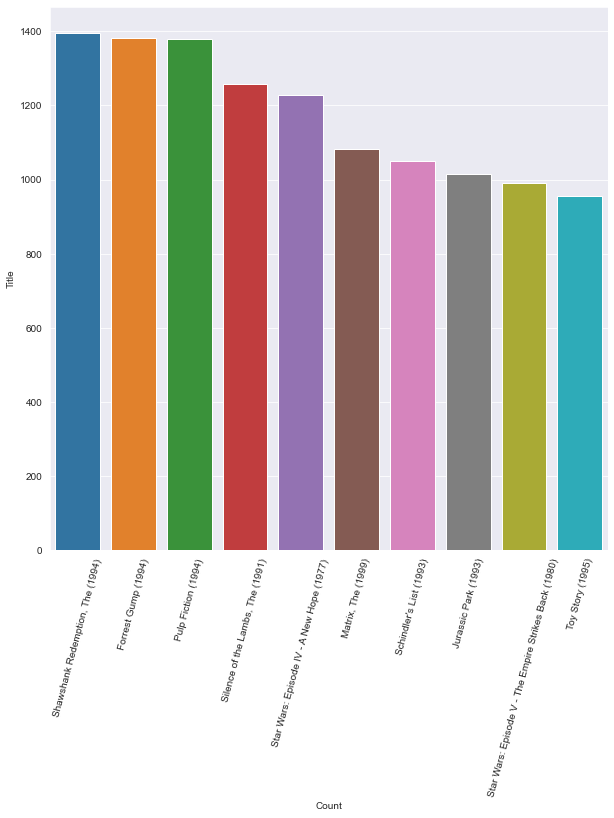

In [23]:
#graphically presenting top 10
plt.figure(figsize=(10, 10))
plt.xticks(rotation=75);
sns.barplot(title_rating.index, title_rating['rating']);
plt.ylabel('Title');
plt.xlabel('Count');

In [24]:
#Using TfidfVectorizer & fit_transform to tf-idf(Term Frequency-Inverse Document Frequency) values
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df_movies['genres'])

In [44]:
print("Feature Names n",tfidf.get_feature_names_out())

Feature Names n ['action' 'adventure' 'animation' 'children' 'comedy' 'crime'
 'documentary' 'drama' 'fantasy' 'fi' 'film' 'genres' 'horror' 'imax'
 'listed' 'musical' 'mystery' 'no' 'noir' 'romance' 'sci' 'thriller' 'war'
 'western']


In [42]:
#Using pivot_table function to covert data in tabular form
movie_user = final_df.pivot_table(index='userId',columns='title',values='rating')
movie_user.head()

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
#Using linear_kernel to get cosine similarilty(Cosine similarity is a measure of similarity, often used to measure document similarity in text analysis)
cos_similarity = linear_kernel(tfidf_matrix, tfidf_matrix)

In [48]:
#defining a function to get movies name in descending order of similar cosine scores
indices=pd.Series(df_movies.index,index=df_movies['title'])

titles=df_movies['title']

def recom_sys(title):
    idx = indices[title]
    similarity_scores = list(enumerate(cos_similarity[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[1:21]
    movie_indices = [i[0] for i in similarity_scores]
    return titles.iloc[movie_indices]

In [35]:
#Using recom_sys function to get list of recommended movies name
recom_sys('Forrest Gump (1994)')

1839           Life Is Beautiful (La Vita è bella) (1997)
2412                  Train of Life (Train de vie) (1998)
6520    Tiger and the Snow, The (La tigre e la neve) (...
351                            Colonel Chabert, Le (1994)
741                             Gone with the Wind (1939)
941                           English Patient, The (1996)
1506                         From Here to Eternity (1953)
1627                                Doctor Zhivago (1965)
2187                                  Barry Lyndon (1975)
2341               Year of Living Dangerously, The (1982)
2509                           Ride with the Devil (1999)
2722               Love Is a Many-Splendored Thing (1955)
3082                                Aimée & Jaguar (1999)
3196                                        Malèna (2000)
3341                       I Know Where I'm Going! (1945)
3436                             Sand Pebbles, The (1966)
3706                    Captain Corelli's Mandolin (2001)
4100      Cran